In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load and Visualise 
- Download
- Load
- Normalize
- Visualise

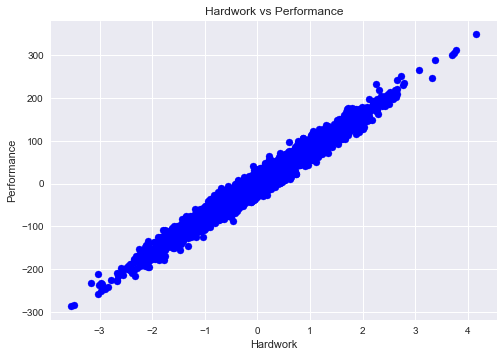

In [23]:
# Load 
X = pd.read_csv('./Desktop/ML Data/Hardwork Pays off Linear Regression/Linear_X_Train.csv')
y = pd.read_csv('./Desktop/ML Data/Hardwork Pays off Linear Regression/Linear_Y_Train.csv')
X_test = pd.read_csv('./Desktop/ML Data/Hardwork Pays off Linear Regression/Linear_X_Test.csv')

# Convert all to numpy arrays
X = X.values
y = y.values
X_test = X_test.values

# Normalize
u = X.mean()
std = X.std()
X = (X-u)/std

# Visulaize
plt.style.use('seaborn')
plt.scatter(X, y, color = 'blue')
plt.title("Hardwork vs Performance")
plt.xlabel("Hardwork")
plt.ylabel('Performance')
plt.show()

## Step 2 : Linear Regression

In [30]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X, Y, theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_-Y[i])**2
    
    return (total_error/m)

def gradient_descent(X, Y, max_itr = 100, learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_itr):
        
        # Compute grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        
        # Update theta 
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        # Store theta and error during updates
        theta_list.append((theta[0], theta[1]))
        error_list.append(e)
    
    return theta,error_list,theta_list

In [32]:
theta,error_list,theta_list = gradient_descent(X, y)
theta

array([ 0.6838508 , 79.90361453])

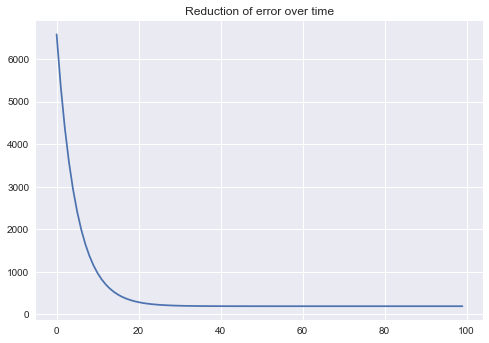

In [34]:
plt.plot(error_list)
plt.title("Reduction of error over time")
plt.show()

## Step 3 - Prediction and Best Line

In [36]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


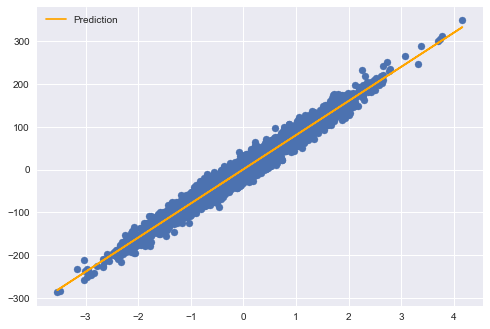

In [42]:
plt.scatter(X, y)
plt.plot(X, y_, color = 'orange', label = 'Prediction')
plt.legend()
plt.show()

In [43]:
# Predict on test data
y_test = hypothesis(X_test, theta)
df = pd.DataFrame(data = y_test, columns = ["y"])
df.to_csv('y_prediction.csv', index = False)

## Step 4 - Computing Score

- Score - R2(R-Squared) or Coefficent Determination

In [45]:
def r2_score(Y, Y_):
     # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100
r2_score(y, y_)

97.09612226971643

## Step 5- Visualising Loss Fx, Gradient Descent Trajectory

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [50]:
theta

array([ 0.6838508 , 79.90361453])

In [51]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

#print(J.shape)

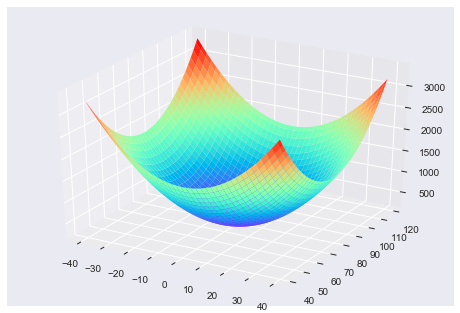

In [53]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

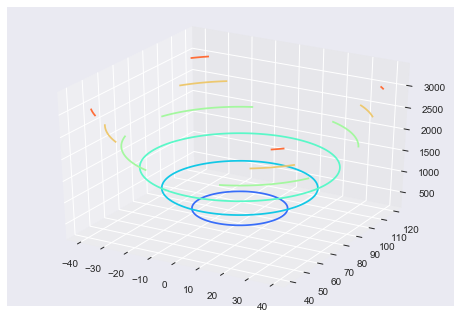

In [54]:
# Contour Plot 
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()